In [1]:
import pandas as pd
import numpy as np 
import matplotlib as mlp 
import seaborn as sns 
import re

In [3]:
data = pd.read_csv('rallit_1.csv')

In [4]:
data.drop(columns= '해당 페이지URL', inplace= True)

In [5]:
new_car = []
for i in data.직급:
    if len(re.findall('\d', i)) == 1:
        new_car.append(''.join(re.findall('\d', i))) 
    elif len(re.findall('\d', i)) == 0:
        new_car.append(0)
    else:
        new_car.append(''.join(re.findall('\d~', i)).replace('~',''))

In [6]:
new_car

['9',
 '4',
 '4',
 0,
 0,
 '1',
 '4',
 '9',
 '4',
 0,
 '4',
 '1',
 '4',
 '4',
 '1',
 0,
 '4',
 '4',
 '1',
 '1',
 '4',
 '1',
 '4',
 '4',
 '4',
 '4',
 '4',
 0,
 '9',
 '4',
 '1',
 '4',
 '4',
 '1',
 '4',
 0,
 '9',
 '4',
 '1',
 '4',
 '4',
 '4',
 '1',
 '9',
 '4',
 0,
 0,
 '4',
 '4',
 '4',
 '4',
 '4',
 '9',
 '4',
 '4',
 '1',
 '4',
 '9',
 0,
 0,
 '4',
 '4',
 0,
 '9',
 0,
 '4',
 '4']

In [7]:
data.직급 = new_car

In [8]:
data

,기업명,주소,직무,직급,우대사항/기술스택,자격요건
0,오비맥주,서울 강남구 영동대로 517 ASEM 및 한국종합무역센타단지 8층,오비맥주 Strategy & Technology팀에서 Sr. Data Enginee...,9,[Tech]\n- Experience in Data Science related p...,[Tech]\n- Proficiency in programming languages...
1,사이벨 헬스 (주),NaN,"의료 데이터를 전송, 처리, 저장하는데 사용될 안전한 클라우드 인프라를 설계하고 개...",4,"- DevOps 및 CI/CD, 프레임워크에 대한 숙련도가 있으신 분\n- 하나 이...",- 컴퓨터 전공 관련학과 학사 이상\n- 영어 회화 및 문서작업 가능자 (Spoke...
2,와탭랩스,서울 서초구 서초대로77길 17 BLOCK77 13층 1303호,와탭랩스 개발팀에서 모니터링 서비스를 함께 만들어나갈 분을 찾고있습니다.,4,• MSA 서비스 구축 및 운영 경험\n• 오픈소스 모니터링 구축 경험\n• ISM...,"필수 자격요건 (경력: 7~12년)\n• Shell, Python 등 하나 이상 스..."
3,인프랩 (인프런),경기 성남시 분당구 대왕판교로 660 유스페이스1 1A 동 4층 405호,인프런의 어드민을 비롯한 백엔드 시스템 개발 업무를 담당합니다.,0,"- TypeScript, Java, Kotlin 등 강타입 (Strongly Typ...",아래 개발팀의 미션과 가치에 동의하시는 분이어야 합니다.\nhttps://tech....
4,롯데헬스케어 주식회사,서울 송파구 올림픽로 300 롯데월드타워앤드롯데월드몰 27층,"""Every Moment of your Healthy Life"" 롯데헬스케어의 서비...",0,"• JavaScript, TypeScript, Golang, Python 경험자\n...",• 1년 이상의 서비스 개발 및 운영 경험자\n• 본인이 사용한 기술과 환경에 대한...
...,...,...,...,...,...,...
62,(주)디랙스,NaN,국내 운동기구 제조 1위 회사로서 장비와 함께 피트니스 AI 솔루션을 개발/공급하...,0,"우대사항\n\nㆍ전공 : 컴퓨터공학/AI 관련, 수학, 통계학\n\nㆍ솔루션 개발경...","스킬\n\nㆍAndroid, iOS, JAVA, JSP, MySQL, Spring ..."
63,주식회사그로잉랩,NaN,"펀더멘탈 데이터 기반의 투자 플랫폼, 버틀러를 함께 키워가실 백엔드 시니어 엔지니어...",9,- 다양한 환경에서 개발하신 경험이 있으신 분\n- 서비스 인프라 설계 및 관리를 ...,- 웹서비스 개발을 7년이상 경험하신 분\n- AWS 등의 클라우드 기반 서비스를 ...
64,리본솔루션,"인천 연수구 갯벌로 12 갯벌타워 별관 A동 511호(송도동, 미추홀타워)","Re:born solution(리본솔루션)의 첫 걸음에 동행하실 분, 함께 성장해 ...",0,• AWS 유경험자\n• 배포 프로세스 환경 구축 및 사용 유경험자\n• RDBMS...,• 백엔드 개발 및 유지보수 경력 1년 이상
65,(주)엔블리스컴즈,서울 동작구 노량진로 10 여성가족복합시설 스페이스살림 503호,위싱노트의 서비스를 설계하고 개발하며 운영합니다.,4,- 컴퓨터공학 및 공학 관련 계열을 전공하신 분\n- 다양한 백엔드 개발 경력을 보...,- 필요한 업무 기술의 경험과 이해도가 높으신 분\n- 웹 서비스에 대한 이해와 책...


In [9]:
# 불용어
from konlpy.tag import Kkma
from konlpy.utils import pprint
from konlpy import tag
# 워드클라우드
import os
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [10]:
kkma = Kkma()

In [11]:
tec_word = ''

for j in data['우대사항/기술스택']:
    
    tec_word += ' '.join(kkma.nouns(j.replace('ㆍ','')))

tec_word

'프레임 프레임워크 워크 숙련도 분 하나 이상 인턴 인턴십 십 협력 경험 직무 등 기반서비스 구축 운영 경험 오픈 오픈소스 소스 모니터링 27001 등 보안 인증 주요 프로젝트 기 기여자 여자 2 업무 경험자등 강 강타입 타입 언어 이해 분 테스트 프레임 프레임워크 워크 코드 작성 오신 분 기본 기본적인 적인 이해도 객 객체 체 역할 책임 협력 메세지 경험 레이 레이어드 어드 아키텍처 필요 적용 개발 관계 패턴 사용 지 실행 실행계획 계획 인덱스 튜닝 리 튜닝등 인프라 위 1 1개 개 이상 애플리케이션 배포경험자 사용 검색 검색서비스 서비스 개발 등 경력 보유자 외부 협력사 협업 경험 레 레거시 거시 시스템 설계 재개발 대규모 트래픽 대용량 데이터 처리 오픈 오픈소스 소스 기여성 성능 능 최적화 테스트 테스트코드 코드 작성 경험 코드리뷰 리뷰 협업 단위 웹 웹뷰 뷰 개발 글로벌 플랫폼 국제화 이용 배포 운영백 백엔드 엔드 실무 경험 3 3년 년 이상 로드 런 런싱 싱 서버 부하 조절 분 머스 2 개발 풀 풀스택 스택 가능 초기 스타트 스타트업 업 주도 주도적인 적인 역할 담당 창업 분대규모 서비스 설계 개발 유지 유지보수 보수 경험 분 테스트 자동화 이용 이종 이종간 간 프로그램 프로그램언어 언어 작성 운영 구축 스타트 스타트업 업 분고가 고가용성 용성 다양 전략 신뢰성 확보 분 주도적 문제 정의 해결 방안 도출 환경 서비스 개발 운영 경험 애플리케이션 트러블 트러블슈팅 슈팅 성능 분석 보안 관점 고민 적용 보신 분 등 1 1가지 가지 이상 프로그래밍 언어1 활용 경험 4 4년 년 이상 2 보유데이터 스크 스크래핑 래핑 경험 분 레 레디스 디스 맴캐 맴캐시드 시드 등 캐싱 도구 사용 다양 데이터베이스 베이스 보신 분 글로벌 서비스 런 런칭 칭 운영 해 해보신 처음 신규 개발 참여 분야 사람 팀워크 협업 협업능력 능력 커뮤니케이션 개발도구 활용 프로세스 표현 수 이슈 효과 효과적인 적인 가능성능 벤치마킹 최적화 경험 물류 도메인 이해 개발 프로그래밍 언어 프레임

In [12]:
abc = ''
for q in data['우대사항/기술스택']:
    abc += ''.join(re.sub('[^a-zA-Z]', ' ', q))
abc

' Tech    Experience in Data Science related projects   Extensive experience working with Azure platforms   services   Industry Optional    CPG or alcohol industry   Data scientist  data engineer  business analyst   Data visualization    Personality Optional    Ability to comprehend and converse in English to communicate effectively  DevOps   CI CD                                                             ReactJS  Angular    Vue   Javascript              MSA                                    ISMS  ISO        CSAP                           Committer         B B SaaS         TypeScript  Java  Kotlin        Strongly Typed                   Jest  Mocha  Junit                                   OOP                                                 NestJS  Spring MVC     MVC Framework                              Layered Architecture                                                  DI  Dependency Injection                                TypeORM  Prisma  MikroORM   Type     ORM               

In [13]:
abc_sum = abc+tec_word
abc_sum

' Tech    Experience in Data Science related projects   Extensive experience working with Azure platforms   services   Industry Optional    CPG or alcohol industry   Data scientist  data engineer  business analyst   Data visualization    Personality Optional    Ability to comprehend and converse in English to communicate effectively  DevOps   CI CD                                                             ReactJS  Angular    Vue   Javascript              MSA                                    ISMS  ISO        CSAP                           Committer         B B SaaS         TypeScript  Java  Kotlin        Strongly Typed                   Jest  Mocha  Junit                                   OOP                                                 NestJS  Spring MVC     MVC Framework                              Layered Architecture                                                  DI  Dependency Injection                                TypeORM  Prisma  MikroORM   Type     ORM               

In [34]:
stop_words ='등 사용 분 환경 가능 다양 년이상 테스트 이해 수 기반 장애 테스트 가능 경험 이해 분 환경 이해 관심 처리 엔드 년 녀 백 업 보유 기술 실무 백 보 신 배포 언어 개선 이용 활용 보신 성능 간 업무 베이스 지식 고민 ㄴ 오픈오픈 소스소스 적인 도구 참여 레 이상 플 코드 작성 관련 본인 유지 사항 검색 서비스 o ㅇ 수행 마이크로 초기  경험자  케이션  우대사항  1 개 리 2 강 기 거시 외부 가 고가 4 스크 하 어 처음 대용량 애 큐 효율 즐거움 새 이 만 마 로 in 밖 제로 유 배 포 십 핀 학위 공유 니스 집단 인정 강점 활 용해 폼 인 줄 ㅁ 오픈 워크 그 션 오 스트 탑 ㄹ 서 3 계 키 5 군 보여 주실 '

stop_words = set(stop_words.split(' '))
word_tokens = kkma.morphs(abc_sum)

result = [word for word in word_tokens if not word in stop_words]

print('불용어 제거 전 :',word_tokens) 
print('불용어 제거 후 :',result)


불용어 제거 전 : ['Tech', 'Experience', 'in', 'Data', 'Science', 'related', 'projects', 'Extensive', 'experience', 'working', 'with', 'Azure', 'platforms', 'services', 'Industry', 'Optional', 'CPG', 'or', 'alcohol', 'industry', 'Data', 'scientist', 'data', 'engineer', 'business', 'analyst', 'Data', 'visualization', 'Personality', 'Optional', 'Ability', 'to', 'comprehend', 'and', 'converse', 'in', 'English', 'to', 'communicate', 'effectively', 'DevOps', 'CI', 'CD', 'ReactJS', 'Angular', 'Vue', 'Javascript', 'MSA', 'ISMS', 'ISO', 'CSAP', 'Committer', 'B', 'B', 'SaaS', 'TypeScript', 'Java', 'Kotlin', 'Strongly', 'Typed', 'Jest', 'Mocha', 'Junit', 'OOP', 'NestJS', 'Spring', 'MVC', 'MVC', 'Framework', 'Layered', 'Architecture', 'DI', 'Dependency', 'Injection', 'TypeORM', 'Prisma', 'MikroORM', 'Type', 'ORM', 'MySQL', 'PostgreSQL', 'RDBMS', 'AWS', 'JavaScript', 'TypeScript', 'Golang', 'Python', 'Azure', 'GCP', 'Cassandra', 'HBase', 'MongoDB', 'Kafka', 'RabbitMQ', 'MQ', 'Terraform', 'Helm', 'Web', '

<function matplotlib.pyplot.show(close=None, block=None)>

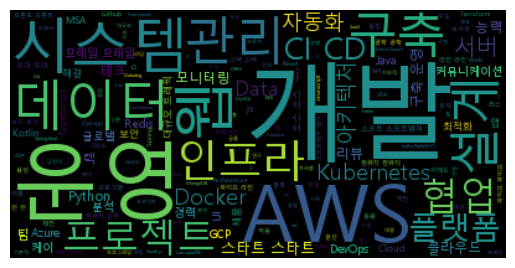

In [35]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf').generate(' '.join(result))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show